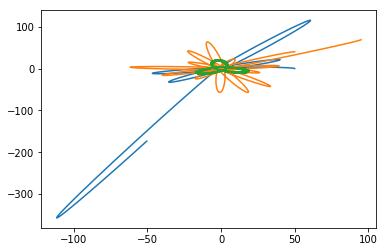

In [11]:
%matplotlib inline

import numpy
import numpy.linalg
import matplotlib.pyplot as plt


G = 50.0  # гравитационная постоянная
collision_distance = 3.0  # всё-таки это не точки
model_delta_t = 0.01
time_to_model = 10.0

class MaterialPoint:
    """Материальная точка, движущаяся по двумерной плоскости"""
    
    def __init__(self, mass: 'float', position: 'numpy.array', velocity: 'numpy.array'):
        # Аннотации типов по желанию, но могут помочь IDE и компилятору, когда таковые имеются
        self.mass = mass
        self.position = position
        self.velocity = velocity
    
    @staticmethod
    def gravity_dencity(dist: 'float')-> 'float':
        if dist > collision_distance:
            return G / dist 
        else:
            return -G / dist ** 3 # будем считать, что отскакивают точки друг от друга резко, но стараться не допускать этого
    
    def force_induced_by_other(self, other: 'MaterialPoint')-> 'numpy.array':
        delta_p = other.position - self.position
        distance = numpy.linalg.norm(delta_p)  # Евклидова норма (по теореме Пифагора)
        force_direction = delta_p / distance
        force = force_direction * self.mass * other.mass * MaterialPoint.gravity_dencity(distance)
        return force
    
    def advance(self):
        # print(self.position)
        self.position += self.velocity * model_delta_t

    def apply_force(self, force: 'numpy.array'):
        # print(force)
        self.velocity += force * model_delta_t / self.mass


centrum = MaterialPoint(500.0, numpy.array([0.0, 0.0]), numpy.array([0.0, 0.0]))
point_1 = MaterialPoint(20.0, numpy.array([50.0, 0.0]), numpy.array([0.0, 15.0]))
point_2 = MaterialPoint(20.0, numpy.array([50.0, 40.0]), numpy.array([-7.0, 7.0]))
point_3 = MaterialPoint(20.0, numpy.array([0.0, 20.0]), numpy.array([50.0, 0.0]))

points = [point_1, point_2, point_3]

def model_step():
    for point_i in points:
        point_i.apply_force(point_i.force_induced_by_other(centrum))
        point_i.advance()
    '''point_1.apply_force(point_1.force_induced_by_other(centrum))
    point_2.apply_force(point_2.force_induced_by_other(centrum))

    point_1.advance()
    point_2.advance()'''

trajec = []
for point_i in points:
    xs = []
    ys = []
    trajec.append([xs,ys])

for stepn in range(int(time_to_model / model_delta_t)):
    for point_i in points:
        coordinats = trajec[points.index(point_i)]
        coordinats[0].append(point_i.position[0])
        coordinats[1].append(point_i.position[1])
    model_step()
'''for stepn in range(int(time_to_model / model_delta_t)):
    xs_1.append(point_1.position[0])
    ys_1.append(point_1.position[1])
    xs_2.append(point_2.position[0])
    ys_2.append(point_2.position[1])
    model_step()
'''
c = plt.Circle((0, 0), 2, color='b')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.add_patch(c)

for point_i in points:
    db = trajec[points.index(point_i)]
    plt.plot(db[0],db[1])
'''plt.plot(xs_1,ys_1)
plt.plot(xs_2,ys_2)'''

plt.show()

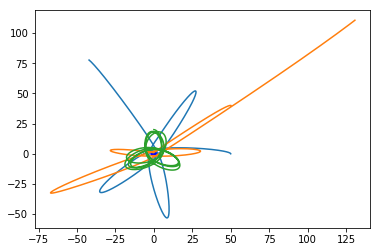

In [16]:
time_to_model = 3.50
point_1 = MaterialPoint(20.0, numpy.array([50.0, 0.0]), numpy.array([0.0, 15.0]))
point_2 = MaterialPoint(20.0, numpy.array([50.0, 40.0]), numpy.array([-7.0, 7.0]))
point_3 = MaterialPoint(20.0, numpy.array([0.0, 20.0]), numpy.array([50.0, 0.0]))

points = [point_1, point_2, point_3]

def model_step():
    for point_i in points:
        point_i.apply_force(point_i.force_induced_by_other(centrum))
        for point_j in points:
           if not(point_i == point_j):
             point_i.apply_force(point_i.force_induced_by_other(point_j))
    for point_i in points:
        point_i.advance()
    '''point_1.apply_force(point_1.force_induced_by_other(centrum))
    point_2.apply_force(point_2.force_induced_by_other(centrum))

    point_1.advance()
    point_2.advance()'''

trajec = []
for point_i in points:
    xs = []
    ys = []
    trajec.append([xs,ys])

for stepn in range(int(time_to_model / model_delta_t)):
    for point_i in points:
        coordinats = trajec[points.index(point_i)]
        coordinats[0].append(point_i.position[0])
        coordinats[1].append(point_i.position[1])
    model_step()
'''for stepn in range(int(time_to_model / model_delta_t)):
    xs_1.append(point_1.position[0])
    ys_1.append(point_1.position[1])
    xs_2.append(point_2.position[0])
    ys_2.append(point_2.position[1])
    model_step()
'''
c = plt.Circle((0, 0), 2, color='b')
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.add_patch(c)

for point_i in points:
    db = trajec[points.index(point_i)]
    plt.plot(db[0],db[1])
'''plt.plot(xs_1,ys_1)
plt.plot(xs_2,ys_2)'''

plt.show()